Nome: Felipe Faustino Brito

Matrícula: 2021007366

# a) Considere o sinal abaixo amostrado a uma taxa de 100Hz. Ele possui 3 componentes de frequências, 2Hz, 4Hz e 44Hz.



s = [ 0 0.6208 0.5125 1.6891 1.0679 2.3083 1.6396 2.3789 2.1087 2.0034 2.3083
1.4194 2.1135 0.8806 1.5275 0.5449 0.7111 0.4243 -0.0674 0.4141 -0.5449
0.3773 -0.5848 0.2336 -0.2448 -0.0000 0.2448 -0.2336 0.5848 -0.3773 0.5449 -0.4141 0.0674 -0.4243 -0.7111 -0.5449 -1.5275 -0.8806 -2.1135 -1.4194 -2.3083 -2.0034 -2.1087 -2.3789 -1.6396 -2.3083 -1.0679 -1.6891 -0.5125 -0.6208 ] 

<h2>Pede-se:
a) Especifique um filtro (diagrama de tolerâncias e parâmetros) para atenuar a frequência de
44Hz em 20dB. A banda de transição deve iniciar em 6Hz tolerando-se uma perda de 3dB
nesta frequência. Qual o nome do tipo de resposta em frequência deste filtro?</h2>

<b>Diagrama de tolerâncias:</b>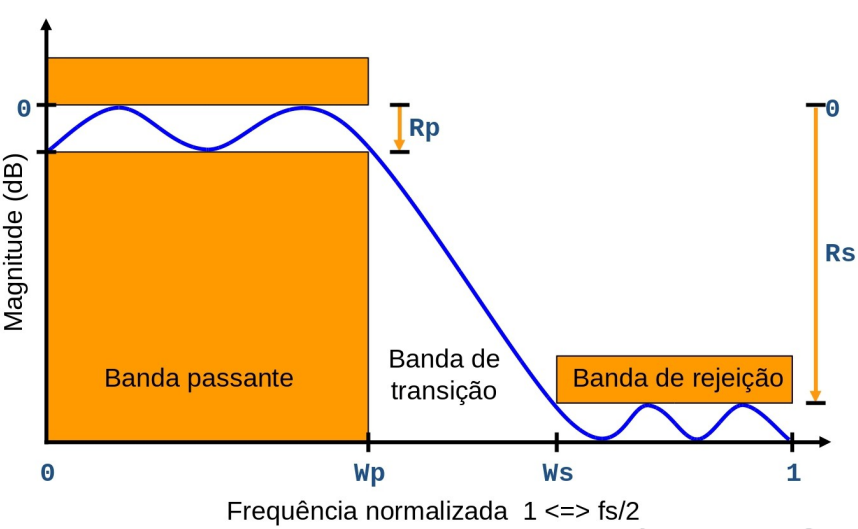

<b>Parâmetros: </b> <br/>
<ul>
  <li>Frequência de Amostragem (fs): 100Hz</li>
  <li>Frequência de Passagem (Wp): 6/50 = 0.12</li>
  <li>Frequência de Rejeição (Ws): 44/50 = 0.88</li>
  <li>Ripple na Banda de Passagem (Rp): 3 dB </li>
  <li>Atenuação na Banda de Rejeição (Rs): 20 dB</li>
</ul>



<b>Tipo de Resposta em Frequência:</b> o filtro terá uma resposta do tipo passa-baixa, o objetivo é atenuar frequências mais altas (44 Hz) e preservar as frequências mais baixas (2 Hz e 4 Hz).

# b) Tente aproximar os requisitos do filtro do item (a) com um modelo Single Pole (fornecer afunção de transferência) e verifique se sua Resposta em Frequência cumpre os requisitos.

A função de transferência de um filtro passa-baixa de primeira ordem no domínio z é dada por:

$$ H(z) = \frac{1-a}{1-az^{-1}}$$
Onde:
$$ a = e^{-2\pi f_s / f_c} $$

𝑓𝑐 a frequência de corte e fs a frequência de amostragem.
Esse filtro tem uma única polo, o que resulta em um comportamento de atenuação gradual.

Para aproximar do filtro, com 44 Hz de atenuação de 20 dB e uma frequência de passagem de até 6 Hz com 3 dB de perda, podemos determinar o valor de 𝑎 a partir da frequência de corte: 𝑓𝑐 = 6 Hz, 𝑓𝑠 = 100 Hz

Substituímos 𝑎 na função de transferência 𝐻(𝑧) para obter a forma final.

Para verificar se esse filtro cumpre os requisitos, calculamos a Resposta em Frequência do filtro. A resposta em frequência 𝐻(𝑒^𝑗𝜔) pode ser obtida substituindo 𝑧 = 𝑒^𝑗𝜔 na função de transferência:
$$ H(z) = \frac{1-a}{1-ae^{-j\omega}}$$

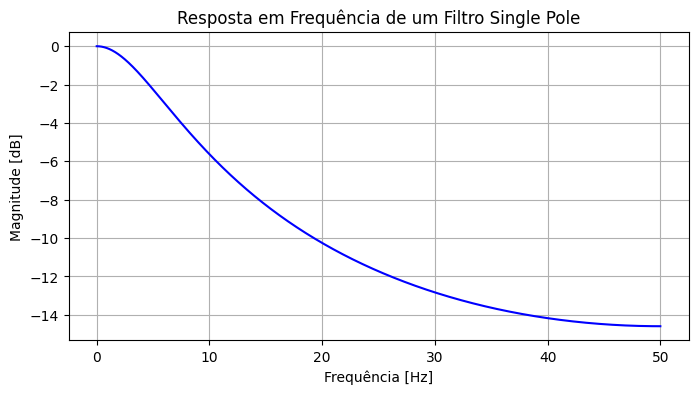

([0.31407783406583367], [1, -0.6859221659341663])

In [ ]:
# Reimportando as bibliotecas necessárias após o reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Função para calcular o parâmetro 'a' de um filtro Single Pole
def single_pole_filter(fc, fs):
    a = np.exp(-2 * np.pi * fc / fs)  # Cálculo de 'a' com base na frequência de corte e amostragem
    b = [1 - a]  # Numerador (1 - a)
    a = [1, -a]  # Denominador (1 - a*z^-1)
    return b, a

# Frequência de corte (6 Hz) e frequência de amostragem (100 Hz)
fc = 6  # Frequência de corte em Hz
fs = 100  # Frequência de amostragem em Hz

# Calculando a função de transferência (Single Pole)
b, a = single_pole_filter(fc, fs)

# Calculando a resposta em frequência do filtro
w, h = freqz(b, a, worN=8000, fs=fs)

# Plotando a resposta em frequência
plt.figure(figsize=(8, 4))
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.title('Resposta em Frequência de um Filtro Single Pole')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.show()

# Exibindo a função de transferência
b, a


A função de transferência do filtro Single Pole é:
$$ H(z) = \frac{1-0.3141}{1-0.6859z^{-1}}$$

<h2>c) Escreva uma função Python para este filtro para processamento em lote (offline) e faça a
filtragem do sinal s com ela. Apresente os espectros do sinal antes e depois de filtrado.</h2>

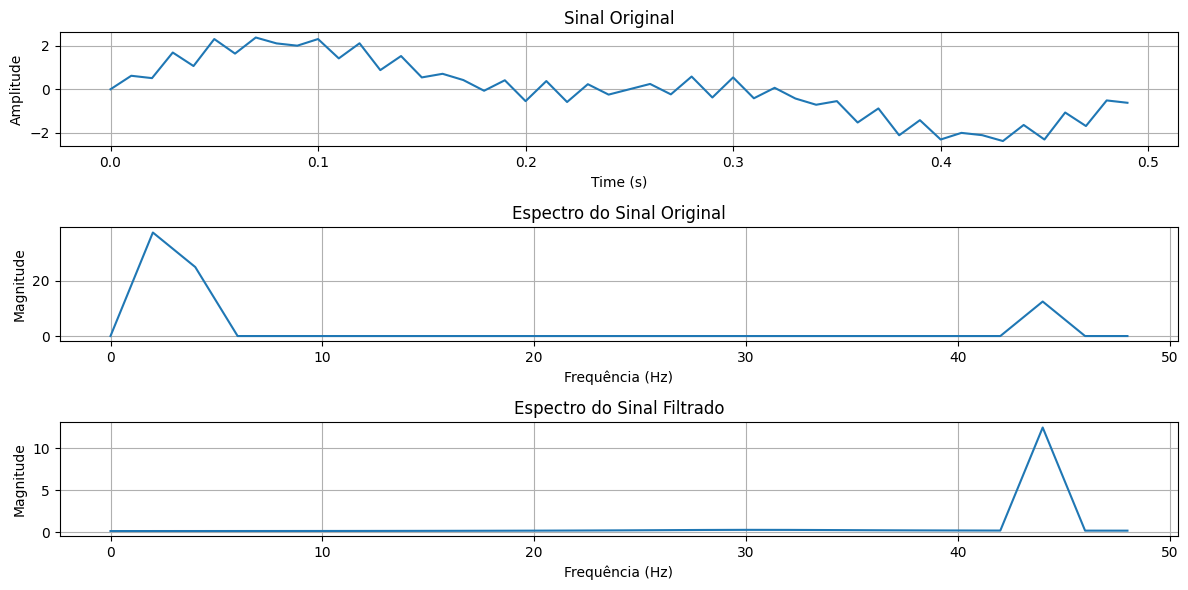

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, freqz


s = np.array([0, 0.6208, 0.5125, 1.6891, 1.0679, 2.3083, 1.6396, 2.3789, 2.1087, 2.0034,
              2.3083, 1.4194, 2.1135, 0.8806, 1.5275, 0.5449, 0.7111, 0.4243, -0.0674,
              0.4141, -0.5449, 0.3773, -0.5848, 0.2336, -0.2448, -0.0000, 0.2448,
              -0.2336, 0.5848, -0.3773, 0.5449, -0.4141, 0.0674, -0.4243, -0.7111,
              -0.5449, -1.5275, -0.8806, -2.1135, -1.4194, -2.3083, -2.0034, -2.1087,
              -2.3789, -1.6396, -2.3083, -1.0679, -1.6891, -0.5125, -0.6208])

fs = 100 


Wp = 30 / (fs / 2)  # Frequência de passagem normalizada (0.12)
Ws = 6 / (fs / 2)  # Frequência de rejeição normalizada (0.88)
Rp = 3  # Ripple na banda de passagem (dB)
Rs = 15  # Atenuação na banda de rejeição (dB)

# filtro Butterworth passa-baixa
def butter_highpass(Wp, Ws, Rp, Rs, fs):
    N, Wn = butter(N=4, Wn=Wp, btype='highpass', analog=False)
    return N, Wn


def apply_filter(signal, fs, Wp, Ws, Rp, Rs):
    b, a = butter(N=4, Wn=Wp, btype='highpass')
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal


filtered_s = apply_filter(s, fs, Wp, Ws, Rp, Rs)


def plot_spectrum(signal, fs, title):
    freqs = np.fft.fftfreq(len(signal), 1/fs)
    spectrum = np.abs(np.fft.fft(signal))
    plt.plot(freqs[:len(freqs)//2], spectrum[:len(freqs)//2])
    plt.title(title)
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)


plt.figure(figsize=(12, 6))


plt.subplot(3, 1, 1)
time = np.arange(len(s)) / fs
plt.plot(time, s)
plt.title('Sinal Original')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)


plt.subplot(3, 1, 2)
plot_spectrum(s, fs, 'Espectro do Sinal Original')


plt.subplot(3, 1, 3)
plot_spectrum(filtered_s, fs, 'Espectro do Sinal Filtrado')

plt.tight_layout()
plt.show()


<h2>d) Escreva uma função Python para processamento de tempo real para este filtro e faça a
filtragem do sinal s com ela. Apresente os espectros do sinal antes e depois de filtrado. </h2>

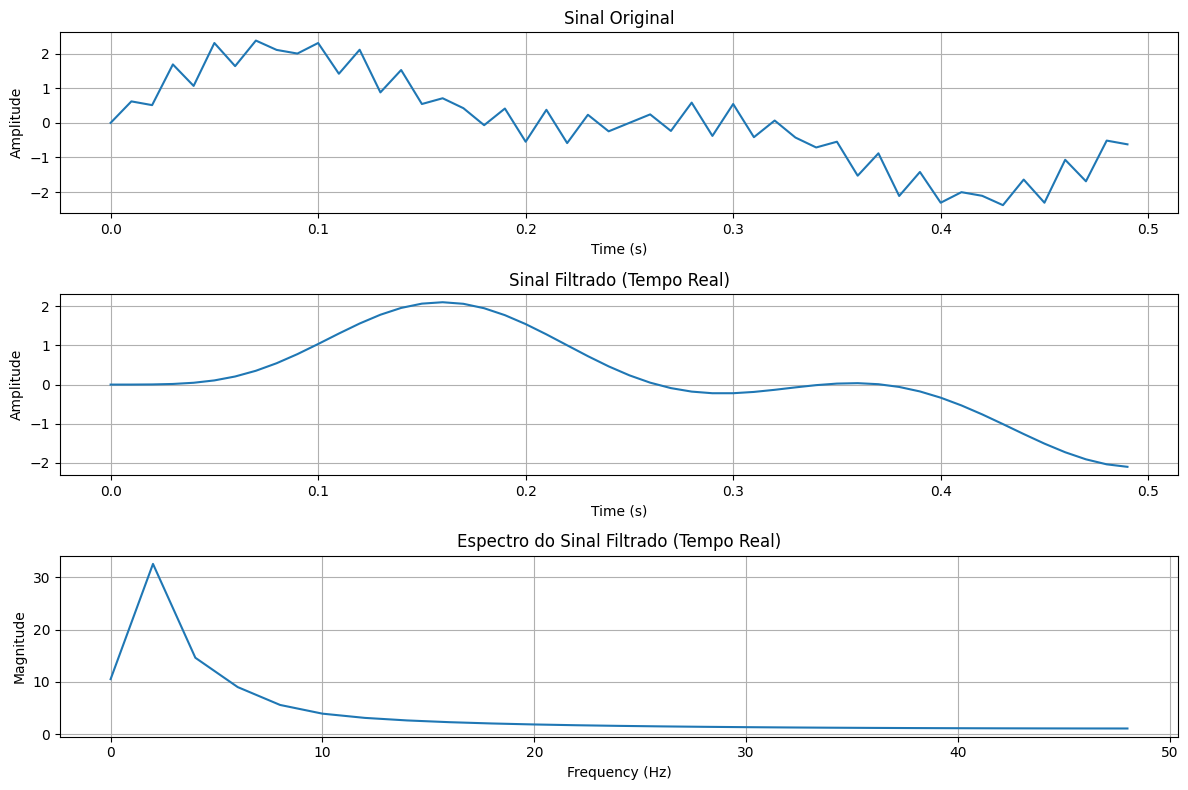

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, lfilter_zi

# Função de filtro Butterworth passa-baixa
def butter_lowpass(Wp, fs, order=4):
    nyquist = 0.5 * fs  # Frequência de Nyquist
    normal_cutoff = Wp / nyquist  # Frequência normalizada
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Função para aplicar o filtro em blocos (tempo real)
def real_time_filter(signal, fs, Wp, block_size=10):
    # Cria o filtro
    b, a = butter_lowpass(Wp, fs)

    # Inicializa o estado inicial do filtro
    zi = lfilter_zi(b, a) * signal[0]  # Estado inicial do filtro

    # Sinal filtrado
    filtered_signal = np.zeros_like(signal)

    # Processamento em blocos (simulação de tempo real)
    for i in range(0, len(signal), block_size):
        block = signal[i:i+block_size]  # Seleciona o bloco de dados
        filtered_block, zi = lfilter(b, a, block, zi=zi)  # Aplica o filtro ao bloco
        filtered_signal[i:i+block_size] = filtered_block  # Armazena o bloco filtrado

    return filtered_signal

# Função para plotar o espectro de um sinal
def plot_spectrum(signal, fs, title):
    freqs = np.fft.fftfreq(len(signal), 1/fs)
    spectrum = np.abs(np.fft.fft(signal))
    plt.plot(freqs[:len(freqs)//2], spectrum[:len(freqs)//2])
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)

# Função para plotar o sinal no tempo
def plot_signal(signal, fs, title):
    time = np.arange(len(signal)) / fs
    plt.plot(time, signal)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)

# Sinal fornecido
s = np.array([0, 0.6208, 0.5125, 1.6891, 1.0679, 2.3083, 1.6396, 2.3789, 2.1087,
              2.0034, 2.3083, 1.4194, 2.1135, 0.8806, 1.5275, 0.5449, 0.7111,
              0.4243, -0.0674, 0.4141, -0.5449, 0.3773, -0.5848, 0.2336,
              -0.2448, -0.0000, 0.2448, -0.2336, 0.5848, -0.3773, 0.5449,
              -0.4141, 0.0674, -0.4243, -0.7111, -0.5449, -1.5275, -0.8806,
              -2.1135, -1.4194, -2.3083, -2.0034, -2.1087, -2.3789, -1.6396,
              -2.3083, -1.0679, -1.6891, -0.5125, -0.6208])

fs = 100  # Frequência de amostragem (100 Hz)
Wp = 6  # Frequência de corte (6 Hz)

# Aplicando o filtro em tempo real ao sinal
filtered_s_real_time = real_time_filter(s, fs, Wp, block_size=10)

# Plotando o sinal original, filtrado e espectros
plt.figure(figsize=(12, 8))

# Sinal original
plt.subplot(3, 1, 1)
plot_signal(s, fs, 'Sinal Original')

# Sinal filtrado (tempo real)
plt.subplot(3, 1, 2)
plot_signal(filtered_s_real_time, fs, 'Sinal Filtrado (Tempo Real)')

# Espectro do sinal filtrado (tempo real)
plt.subplot(3, 1, 3)
plot_spectrum(filtered_s_real_time, fs, 'Espectro do Sinal Filtrado (Tempo Real)')

plt.tight_layout()
plt.show()
